<a href="https://colab.research.google.com/github/josemoragonzalez/ejemplosColab/blob/master/GastoClasificaci%C3%B3nFuncional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segundo ejercicio con Colab 

In [ ]:
# Librerias necesarias para el análisis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Descarga de archivo
dfbruto = pd.read_excel('https://www.dipres.gob.cl/598/articles-45401_doc_xls_Funcional2.xlsx')

In [ ]:
#------------------------------------------------------
## EXTRACCIÓN DE REGISTROS VALIOSOS PARA EL ANÁLISIS
#------------------------------------------------------

# Extracción de filas que contienen la información de gasto
dfcolumns = dfbruto.iloc[4].fillna(0).astype(int)
dfSPG = dfbruto.iloc[9:15]
dfD = dfbruto.iloc[17:19]
dfOPS = dfbruto.iloc[21:26]
dfAE = dfbruto.iloc[28:37]
dfPMA = dfbruto.iloc[39:42]
dfVSC = dfbruto.iloc[44:48]
dfS = dfbruto.iloc[50:55]
dfARCR = dfbruto.iloc[57:59]
dfE = dfbruto.iloc[61:66]
dfPS = dfbruto.iloc[68:76]

# Lista de dfs
listadfs = [dfSPG, dfD, dfOPS, dfAE, dfPMA, dfVSC, dfS, dfARCR, dfE, dfPS]

# Nombres de dfs
nombresdfs = [dfbruto.iloc[8,1], dfbruto.iloc[16,1], dfbruto.iloc[20,1], dfbruto.iloc[27,1], dfbruto.iloc[38,1], dfbruto.iloc[43,1],
              dfbruto.iloc[49,1], dfbruto.iloc[56,1], dfbruto.iloc[60,1], dfbruto.iloc[67,1]]

In [ ]:
# Creamos el Dataframe con la unión de todos los elementos anteriores
dfgasto = pd.DataFrame()

# La unión la hacemos a través de un loop sobre la lista de dfs, añadiendo una columnas con el nombre de la clasificación de cada df
for i, row in enumerate(listadfs):
  row['Clasificación'] = nombresdfs[i]
  dfgasto = dfgasto.append(row)


In [ ]:
#--------------------------------------------------------------------------------
# Establecemos los nombres de las columnas y elaboramos una lista con los años
#--------------------------------------------------------------------------------

# Establece los nommbres de columnas
nombcols = dfcolumns.to_list()
nombcols[0] = 'Código'
nombcols[1] = 'Subclasificación'
nombcols.append('Clasificación')
dfgasto.columns = nombcols

# Se crea una lista con los años usando los nombres de las columnas
no_anios = ['Código', 'Subclasificación', 'Clasificación']  
columnas = [n for n in nombcols if n not in no_anios] 

In [ ]:
# Cambiar la forma de la matriz a un formato de tabla larga
dfgasto_t = pd.melt(dfgasto, id_vars=['Código', 'Clasificación', 'Subclasificación'], value_vars=columnas)

Text(0.5, 1.0, 'Evolución anual de gasto gobierno central por Item de Estado de Operaciones, millones de pesos 2019')

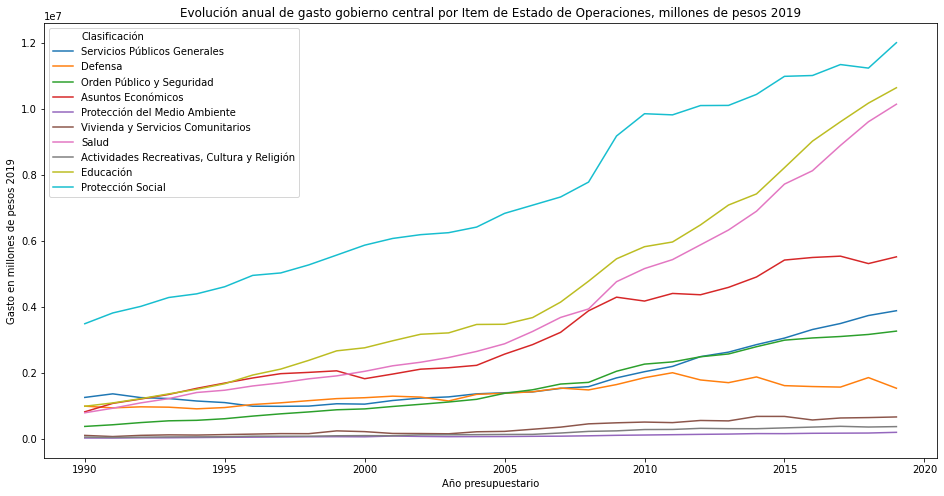

In [ ]:
# Graficar eevolución usando un lineplot de seaborn
plt.figure(figsize=(16,8))
ax = sns.lineplot(x='variable', y='value', data=dfgasto_t, estimator=sum, ci=None, hue='Clasificación')
ax.set_ylabel('Gasto en millones de pesos 2019')
ax.set_xlabel('Año presupuestario')
ax.set_title('Evolución anual de gasto gobierno central por Item de Estado de Operaciones, millones de pesos 2019')

In [ ]:
# Establecer el peso porcentual por año de cada Item
dfgasto_p = dfgasto.set_index(['Clasificación', 'Subclasificación']).drop(columns=['Código'])
dfgasto_p2 = dfgasto_p.divide(dfgasto_p.sum(), axis=1).reset_index().set_index('Clasificación').drop(columns=['Subclasificación'])

# Agrupar por Clasificación
dfgasto_p_clas = dfgasto_p2.groupby(by='Clasificación').sum()

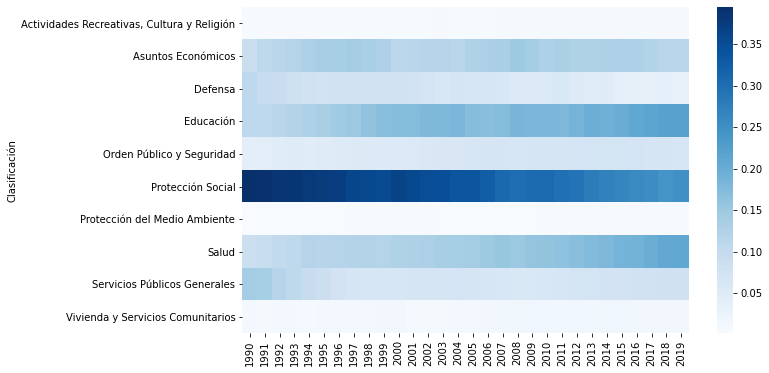

In [ ]:
# Graficar heatmap para ver concentraciones de importancia de cada item, y su evolución en el tiempo
plt.figure(figsize=(10,6))
ax = sns.heatmap(dfgasto_p_clas,cmap="Blues")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:856: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  self.fig.tight_layout()


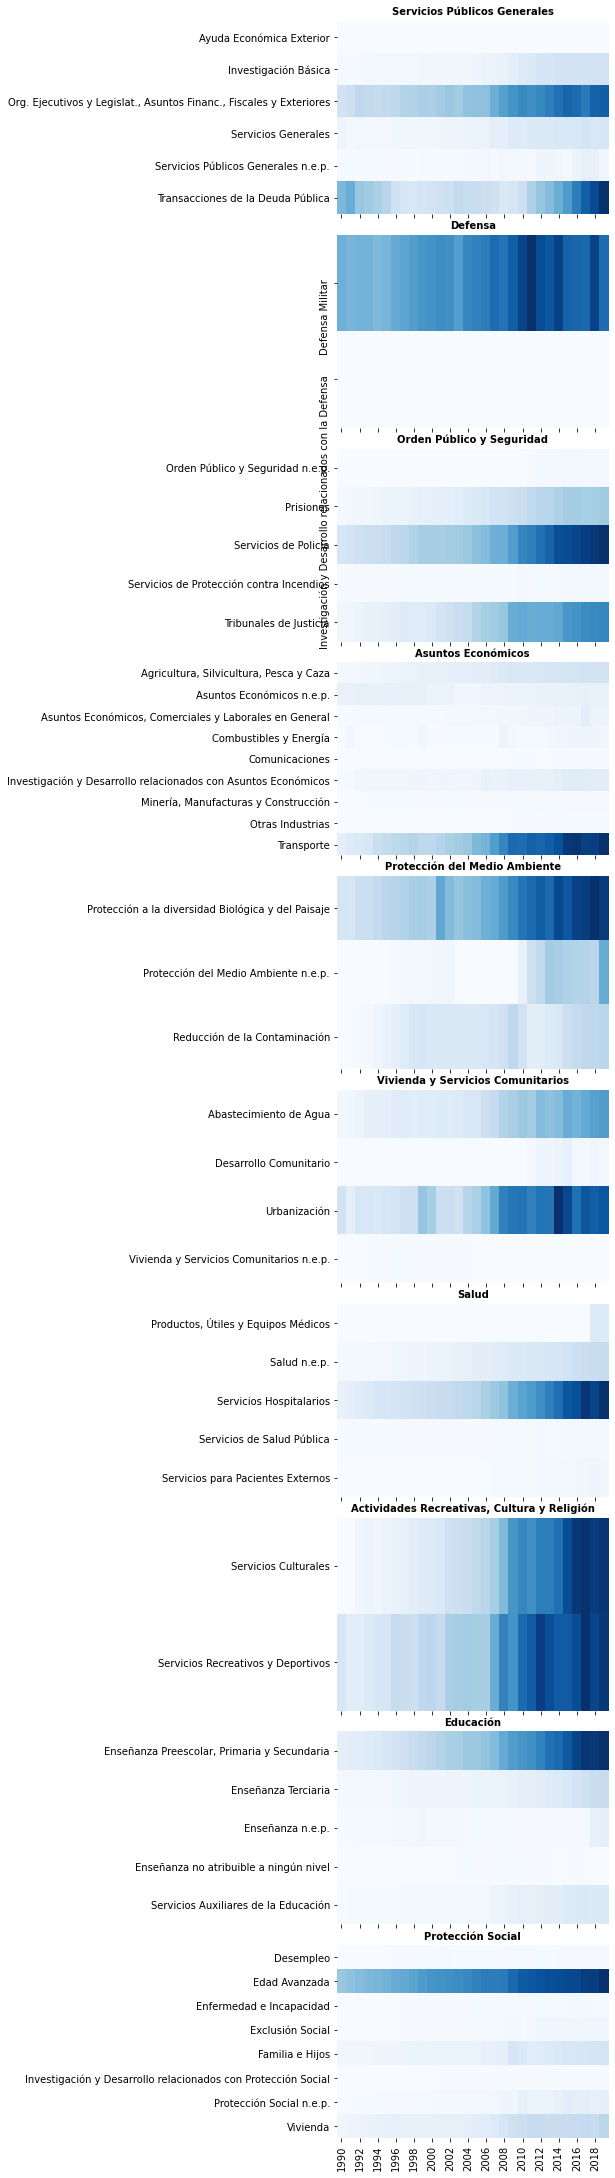

In [ ]:
# Definimos la función
def creaheatmap(data,color):
  data = data.pivot(index="Subclasificación", columns='variable', values='value')
  g = sns.heatmap(data, cmap='Blues', cbar=False)

# A través de un with aplicamos la función en un FacetGrid
with sns.plotting_context(font_scale=5.5):
  g = sns.FacetGrid(dfgasto_t, col="Clasificación", col_wrap=1, height=3, aspect=1.5,sharey=False)
  g = g.map_dataframe(creaheatmap)
  g.set_titles(col_template="{col_name}", fontweight='bold', fontsize=18)